# Analiza podatkov

Podatki so zbrani s spletne strani "https://en.wikipedia.org/wiki/List_of_days_of_the_year". 

Najprej so predstavljeni vsi podatki, sledijo odgovori na začetna vprašanja.

### Tabela vseh oseb, njihovih nazivov, letnic rojstva in smrti, če so te podane tudi njihove življenjske dobe:
Če je življenjska doba 404, pomeni, da vsaj ena od vrednosti ni bila podana.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")

pd.set_option("display.max_rows", 10)
OSEBE = pd.read_csv("dat_oseb.csv")
OSEBE

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenjska doba
0,1.januar,Lucius Aelius,adopted son and intended successor of Hadrian,101.0,138.0,37
1,1.januar,Telemachus,Christian monk and martyr,NaN,404.0,404
2,1.januar,Odo I,Frankish king,860.0,898.0,38
3,1.januar,Ramiro II,king of León and Galicia,NaN,951.0,404
4,1.januar,William of Volpiano,Italian abbot,962.0,1031.0,69
...,...,...,...,...,...,...
117921,31.december,J. J. Arcega-Whiteside,Spanish-American football player,1996.0,NaN,404
117922,31.december,Cameron Carter-Vickers,English-American soccer player,1997.0,NaN,404
117923,31.december,Alycia Parks,American tennis player,2000.0,NaN,404
117924,31.december,Katie Volynets,American tennis player,2001.0,NaN,404


### Tabela vseh bitk ali vojn ter datum kdaj so omenjene:

In [3]:
BITKE = pd.read_csv("dat_bitk.csv")
BITKE

,Ime bitke ali vojne,Datum
0,American Revolutionary War,1.januar
1,American Civil War,1.januar
2,Cristero War,1.januar
3,World War II,1.januar
4,Cold War,1.januar
...,...,...
3442,Battle of Stones River,31.december
3443,World War II,31.december
3444,Cold War,31.december
3445,Benjamin Ward,31.december


## Koliko je podatkov za posamezen dan?
### Ali je očitno manj podatkov za 29. februar?

Prva tabela prikazuje količino podatkov na posamezen dan, razvrščeno po številu rojstev v naraščajočem zaporedju. 
Druga tabela je razvrščena po številu zabeleženih smrti. Na koncu je izločen še 29.
februar.

In [4]:
ST_PODATKOV = pd.read_csv("st_podatkov.csv")
ST_PODATKOV.sort_values(by ="Št smrti", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojn,Št rojstev,Št smrti
58,28.februar,26,0,158,35
310,6.november,22,4,113,49
131,11.maj,34,3,102,52
48,18.februar,50,11,139,52
157,6.junij,38,9,102,53
...,...,...,...,...,...
272,29.september,54,11,243,137
250,7.september,71,12,269,138
32,2.februar,51,9,331,153
63,4.marc,75,11,432,165


In [5]:
ST_PODATKOV.sort_values(by ="Št rojstev", ascending=True)

,Datum,Št dogodkov,Št bitk ali vojn,Št rojstev,Št smrti
130,10.maj,54,8,102,61
131,11.maj,34,3,102,52
157,6.junij,38,9,102,53
158,7.junij,51,8,103,69
129,9.maj,41,9,112,106
...,...,...,...,...,...
63,4.marc,75,11,432,165
20,21.januar,46,6,432,106
298,25.oktober,42,8,440,122
324,20.november,48,11,506,134


In [6]:
filter = ST_PODATKOV["Datum"] == "29.februar"
ST_PODATKOV[filter]

,Datum,Št dogodkov,Št bitk ali vojn,Št rojstev,Št smrti
59,29.februar,39,6,127,64


29. februar nima najmanjšega števila smrti, rojstev ali dogodkov (npr. 28. februar), je
pa vseeno precej nizko na lestvici. Sklepamo lahko, da ima kot najredkejši dan v letu
nekaj manj podatkov, a to ni edino merilo.

### Ali obstaja kakšen trend za smrti ali rojstva skozi leto?

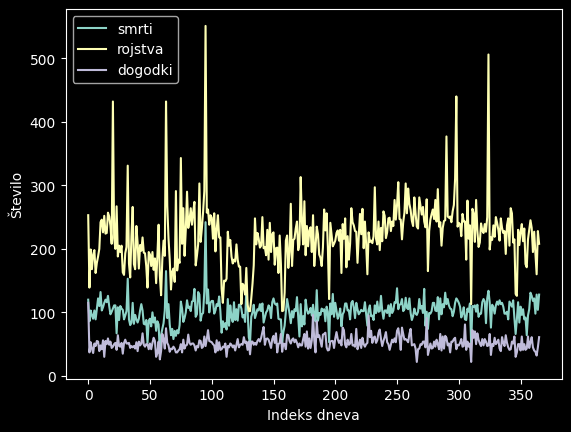

In [7]:
zbrani_podatki = pd.DataFrame({
   'smrti': ST_PODATKOV["Št smrti"],
   'rojstva': ST_PODATKOV["Št rojstev"],
   'dogodki': ST_PODATKOV["Št dogodkov"],
   })
lines = zbrani_podatki.plot.line(xlabel="Indeks dneva", ylabel="Število")

Opazimo lahko manjši padec rojstev in smrti v začetku leta, ne pojavi pa se pri
splošnih dogodkih, zato lahko sklepamo, da razlog niso le manjkajoči podatki. Prav
tako lahko opazimo, da se število rojstev poveča v drugi polovici leta.

## Kako širok je razpon podatkov?

In [8]:
razpon_rojstva = f"od {OSEBE["Rojstvo"].min()} do {OSEBE["Rojstvo"].max()}"
razpon_rojstva

'od -711.0 do 2021.0'

In [9]:
razpon_smrti = f"od {OSEBE["Smrt"].min()} do {OSEBE["Smrt"].max()}"
razpon_smrti

'od -1203.0 do 2024.0'

Na Wikipediji je prva letnica rojstev na specifičen dan 711 pr. n. št., najkasnejša pa 3
leta nazaj.
Pri zabeleženi smrti pa je prvi podatek letnica 1203 pr. n. št. pa vse do letošnjega
leta.

### Je naša informiranost skozi leta naraščala?

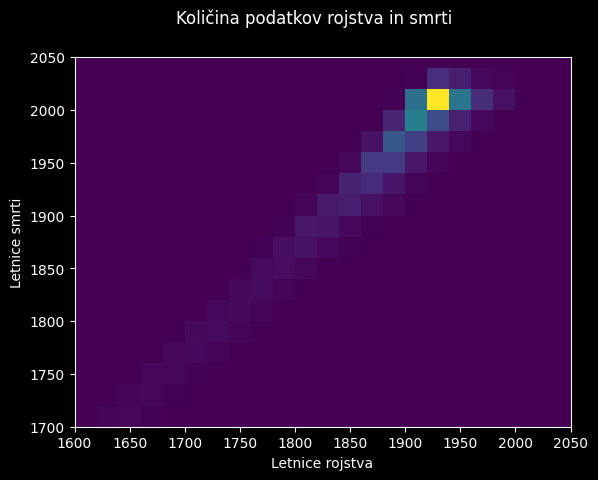

In [24]:
from grafi import komet_graf_za_informiranost

filter = OSEBE["Življenjska doba"] != 404
podana_zivljenjska_doba = OSEBE[filter]

x_os = pd.to_numeric(podana_zivljenjska_doba[f"Rojstvo"], downcast='signed')
y_os = pd.to_numeric(podana_zivljenjska_doba[f"Smrt"], downcast='signed')

komet_graf_za_informiranost(x_os, y_os)

Večina vseh rojstev in smrti je zabeleženih proti koncu 2. tisočletja, oziroma, za smrti se nadaljuje tudi v 3. tisočletje. Na grafu so prikazani samo podatki, ki imajo podano tako letnico rojstva, kot tudi smrti in ker Wikipedija ne napoveduje prihodnosti, še živeče osebe, tu niso zabeležene. 

Text(0, 0.5, 'Število zabeleženih podatkov')

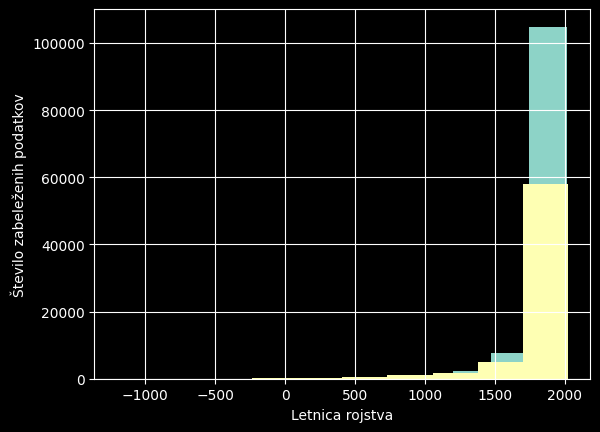

In [11]:
OSEBE["Rojstvo"].hist()
OSEBE["Smrt"].hist()
plt.xlabel("Letnica rojstva")
plt.ylabel("Število zabeleženih podatkov")

Tako pri rojstvu, kot smrti lahko opazimo, da število zabeleženih podatkov hitro narašča. Tokrat neodvisno od vrednosti drugega, zato rojstvo ne začne vpadat v začetkih 3. tisočletja.

### Ali je podaljšana življenjska doba očitna? 

Povprečna življenjska doba zabeleženih oseb rojenih do (vključno z) leta 1800:

In [12]:
filter = podana_zivljenjska_doba["Rojstvo"] <= 1800
rojstvo_do_1800 = podana_zivljenjska_doba[filter]
rojstvo_do_1800["Življenjska doba"].mean()

60.07460431082478

Povprečna življenjska doba zabeleženih oseb rojenih po letu 1800:

In [13]:
filter = podana_zivljenjska_doba["Rojstvo"] > 1800
rojstvo_po_1800 = podana_zivljenjska_doba[filter]
rojstvo_po_1800["Življenjska doba"].mean()

72.02274071389053

Da, življenjska doba po 18. stoletju je očitno daljša kot Življenjska doba prej.

### Kako je življenjska doba porazdeljena?

Točen graf, ki je zaradi samega števila podatkov težje razumljiv:

<Axes: xlabel='Število pojavitev', ylabel='Življenjska doba'>

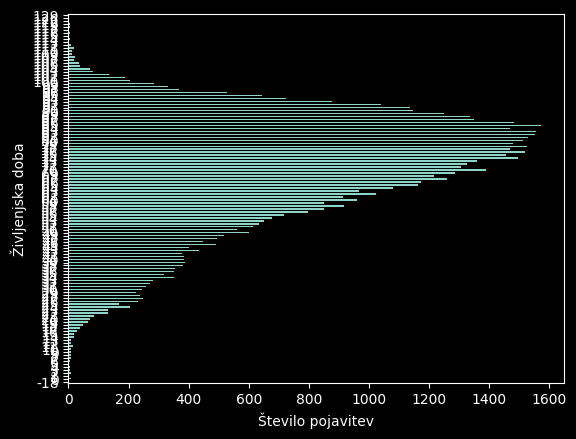

In [14]:
pojavitev_zd = podana_zivljenjska_doba.groupby(by="Življenjska doba").size()
pojavitev_zd.plot.barh(xlabel="Število pojavitev", ylabel="Življenjska doba")

Graf, ki prikazuje samo vsako 4. skupino življenskih dob, in je zato samo približek:

<Axes: xlabel='Število pojavitev', ylabel='Življenjska doba'>

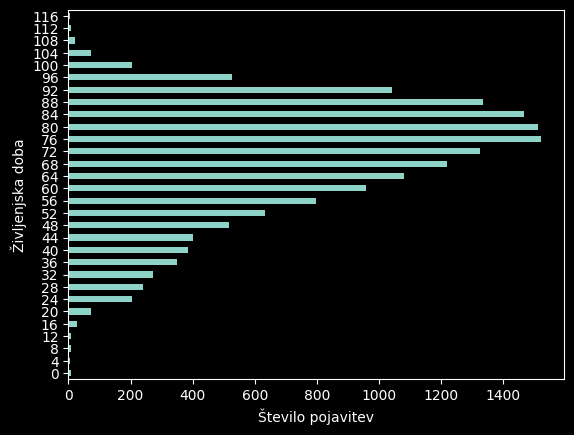

In [15]:
pojavitev_zd_zaokrozeno = pojavitev_zd[pojavitev_zd.index % 4 == 0]
pojavitev_zd_zaokrozeno.plot.barh(xlabel="Število pojavitev", ylabel="Življenjska doba")

### Kako so podatki porazdeljeni?

<Axes: >

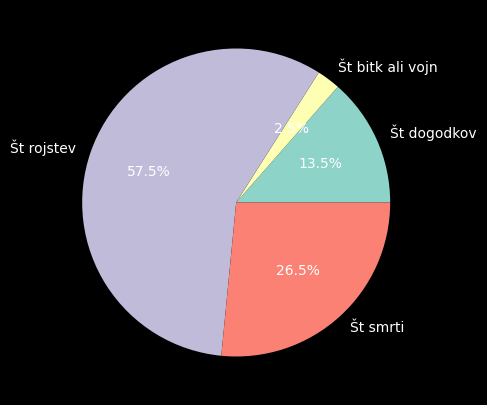

In [16]:
ST_PODATKOV.drop(columns=["Datum"]).sum().plot.pie(y="delež podatkov", figsize=(5, 5), autopct='%1.1f%%')

V procentih predstavljeni deleži podatkov. 
Število bitk ali vojn je 2.5%

## V kolikšni meri vplivajo bitke na ostale podatke?

Tabela dni, urejenih po naraščajočem številu bitk:

In [17]:
ST_PODATKOV.sort_values(by ="Št bitk ali vojn").drop(columns=["Št rojstev", "Št smrti"])

,Datum,Št dogodkov,Št bitk ali vojn
58,28.februar,26,0
286,13.oktober,40,1
55,25.februar,30,2
13,14.januar,30,2
131,11.maj,34,3
...,...,...,...
260,17.september,66,20
296,23.oktober,58,20
313,9.november,70,20
235,23.avgust,68,23


Avgust je očitno posebej priljubljen mesec za bitke ali vojne. Največ jih je omenjenih 5. Avgusta, in sicer:

In [18]:
filter = BITKE["Datum"] == "5.avgust"
BITKE[filter]

,Ime bitke ali vojne,Datum
1971,Battle of Maserfield,5.avgust
1972,Edward the Elder,5.avgust
1973,Battle of Alhandic,5.avgust
1974,Byzantine–Norman wars,5.avgust
1975,First Scottish War of Independence,5.avgust
...,...,...
1990,Warsaw,5.avgust
1991,Cold War,5.avgust
1992,Vietnam War,5.avgust
1993,Indo-Pakistani War of 1965,5.avgust


### Ali bo zaradi bitk očiten narast števila smrti?

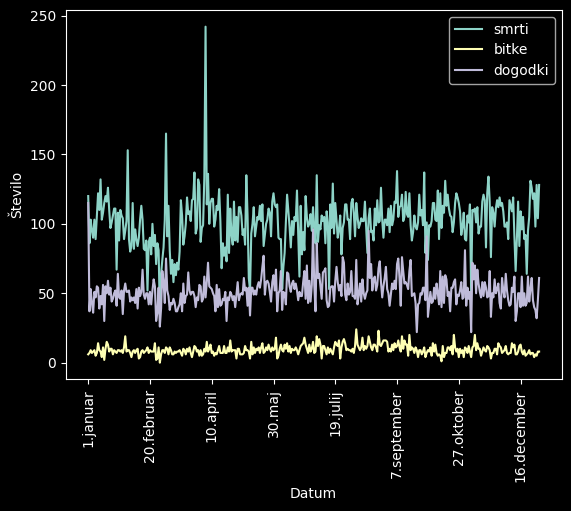

In [33]:
zbrani_podatki = pd.DataFrame({
    "Datum": ST_PODATKOV["Datum"],
    "smrti": ST_PODATKOV["Št smrti"],
    "bitke": ST_PODATKOV["Št bitk ali vojn"],
    "dogodki": ST_PODATKOV["Št dogodkov"]
})

zbrani_podatki.set_index("Datum", inplace=True)
lines = zbrani_podatki.plot.line(xlabel="Datum", ylabel="Število")
plt.xticks(rotation=90)
plt.show()

Lahko opazimo nekaj ujemanj med naraščanjem ali padanjem obeh grafov, ki pa so prisotni tudi pri dogodkih.
Tako lahko sklepamo, da so ujemanja posledica pomanjkanja informacij, ne pa vpliva bitk na smrt.

## Zaključek

Podatkov je veliko, vendar niso vsi pravilni, sploh na Wikipediji in ostalih straneh, ki imajo javen dostop do urejanja. Dober primer tega je življenska doba:


In [21]:
razpon_dobe = f"od {podana_zivljenjska_doba["Življenjska doba"].min()} do {podana_zivljenjska_doba["Življenjska doba"].max()}"
razpon_dobe

'od -18 do 129'

In [22]:
podana_zivljenjska_doba.sort_values(by ="Življenjska doba", ascending=False)

,Datum,Ime,Naziv,Rojstvo,Smrt,Življenjska doba
103089,17.november,Gazi Evrenos,Ottoman general,1288.0,1417.0,129
31415,9.april,Jimmu,emperor of Japan,-711.0,-585.0,126
15894,21.februar,Jeanne Calment,"French super-centenarian, oldest verified pers...",1875.0,1997.0,122
66544,4.avgust,Jeanne Calment,French super-centenarian; holds records for th...,1875.0,1997.0,122
84147,24.september,Sarah Knauss,"American super-centenarian, oldest verified Am...",1880.0,1999.0,119
...,...,...,...,...,...,...
104125,20.november,John I,king of France and Navarra,1316.0,1316.0,0
73297,25.avgust,Stephen Badlam,American artisan and military officer,1815.0,1815.0,0
60710,17.julij,Sverker II,king of Sweden,1210.0,1210.0,0
16060,22.februar,Henry,duke of Cornwall,1511.0,1511.0,0


Jeanne Calment trenutno drži rekord za najdlje živečo osebo, vendar je po zbranih podatkih šele na 3. mestu.
Prav tako naj bi norveški inženir Rolf Skår živel kar -18 let.